# Setup

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Classification Models:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

import ml_project
%load_ext autoreload
%autoreload 2

In [2]:
from ml_project.preprocess import features
from ml_project.preprocess import labels
from ml_project.preprocess import balance

from ml_project.classification import evaluation
from ml_project import utils

# Load Data

In [3]:
data_filepath = "./data/Dataset_Final_2021-11-29.csv"
df = pd.read_csv(data_filepath, index_col=0)
df.head()

,title,release,artist_name,duration,artist_familiarity,artist_hotttnesss,year,majorityGenre,spotTrackId,spotAlbumId,...,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1,N Gana,Afropea 3 - Telling Stories To The Sea,Waldemar Bastos,273.18812,0.543690,0.373679,0,World,7xytAVGt7bJr6GNwl8JGDD,6TIs0VxReti0S97HFbzbW4,...,0.276,0.000141,2.0,0.1260,-14.881,1.0,0.0389,110.968,4.0,0.817
3,Rock-N-Rule,I'm Only A Man (Bonus Track Version),Emery,217.57342,0.738996,0.563367,2007,Rock,7cHBQZMQQwmWwpGNn5FaKG,7qAIbTVPZxJUKzdMaPiBSL,...,0.927,0.000675,3.0,0.0541,-4.865,0.0,0.0541,176.893,4.0,0.486
7,Night And Day,The Best Of,The Maytals,175.20281,0.606414,0.377603,1994,Reggae,3oVXULfSqz58UUvpOzjERL,5NqzfFpjRgxmLYQkFkMecc,...,0.694,0.011100,4.0,0.0512,-8.414,0.0,0.1110,75.270,4.0,0.749
9,Dancing In The Dark,The Look Of Love,Diana Krall,349.98812,0.747939,0.561394,2001,Jazz,7rdxXGFRW2gyfbZL9qmpTs,4nmjBh2Td9I9x9JDncrQr3,...,0.339,0.316000,7.0,0.1120,-15.477,1.0,0.0272,109.218,4.0,0.482
13,Dream Of Love,Lost In Paradise,X-Perience,218.53995,0.586126,0.416824,2006,Pop,72mnbEbPWUyzi8nJzzaM9K,5a3yYXnovtRazWpu8cVJgG,...,0.852,0.000017,4.0,0.2330,-4.270,0.0,0.0374,163.950,4.0,0.489


In [4]:
X = features.get_spotify_feature_matrix(df)
X.shape

(107860, 11)

In [5]:
y_str = labels.get_str_labels(df)

In [6]:
genres, y, genre_counts = labels.get_labels(y_str)

#  Explore Data

## Class Imbalance

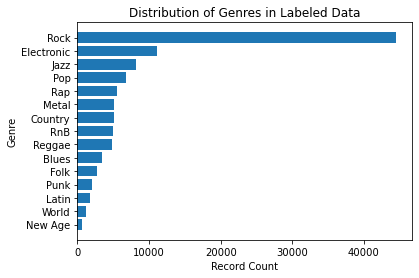

In [7]:
utils.plot_label_distribution(y_str)

Let's try to balance the dataset a bit

In [8]:
# New balanced dataset
X_bal, y_bal, y_str_bal  = balance.balance_dataset(X, y, y_str, genres, genre_counts)

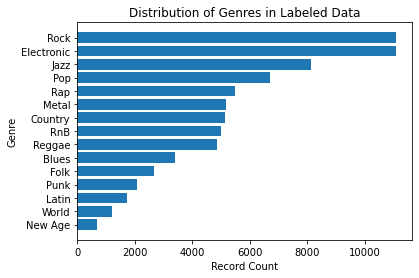

In [9]:
utils.plot_label_distribution(y_str_bal)

# Training Prep

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

# Models

Decision Tree

In [13]:
model = DecisionTreeClassifier()

In [14]:
model.fit(X_train, y_train)
print(f"Mean accuracy on test set: {round(model.score(X_test, y_test), 5)}")
evaluation.df_confusion_matrix(model, X_test, y_test, genres)

Mean accuracy on test set: 0.34647


,Blues_label,Country_label,Electronic_label,Folk_label,Jazz_label,Latin_label,Metal_label,New Age_label,Pop_label,Punk_label,Rap_label,Reggae_label,RnB_label,Rock_label,World_label
Blues_pred,115,60,38,47,128,17,17,6,53,8,17,39,52,76,25
Country_pred,62,320,29,58,64,16,8,2,180,11,8,34,69,145,8
Electronic_pred,35,33,1106,27,225,18,104,38,104,19,75,107,73,248,27
Folk_pred,36,69,29,90,89,9,7,4,55,1,6,13,30,67,16
Jazz_pred,86,74,218,96,641,28,21,40,64,2,18,39,84,140,49
Latin_pred,18,26,12,16,29,74,3,1,39,0,11,34,46,28,18
Metal_pred,8,11,82,4,12,2,476,4,25,65,9,10,8,248,1
New Age_pred,4,1,30,5,39,0,6,23,5,1,2,1,1,16,3
Pop_pred,53,152,115,50,78,56,31,6,351,16,50,76,131,219,27
Punk_pred,7,7,12,4,7,1,77,0,12,139,6,14,1,134,1


Random Forest

In [15]:

hyper = {"max_depth": 17, "max_features": "log2", "n_estimators": 150}
model = RandomForestClassifier(**hyper)
model.fit(X_train, y_train)
print(f"Mean accuracy on test set: {round(model.score(X_test, y_test), 5)}")

evaluation.df_confusion_matrix(model, X_test, y_test, genres)


Mean accuracy on test set: 0.49711


,Blues_label,Country_label,Electronic_label,Folk_label,Jazz_label,Latin_label,Metal_label,New Age_label,Pop_label,Punk_label,Rap_label,Reggae_label,RnB_label,Rock_label,World_label
Blues_pred,146,63,36,24,181,10,2,0,37,0,9,17,57,114,2
Country_pred,27,488,6,38,78,4,0,0,175,0,2,14,34,148,0
Electronic_pred,3,11,1545,6,229,2,61,6,53,5,51,60,38,169,0
Folk_pred,27,84,20,104,141,3,2,0,40,0,4,5,26,65,0
Jazz_pred,43,56,198,38,1007,4,4,1,40,0,14,21,78,96,0
Latin_pred,13,19,11,2,35,97,0,0,73,0,18,17,46,19,5
Metal_pred,0,2,70,2,11,0,613,0,16,27,8,0,1,215,0
New Age_pred,1,2,46,2,66,0,1,6,1,0,0,1,0,11,0
Pop_pred,9,153,85,33,89,14,1,0,558,1,34,45,105,284,0
Punk_pred,0,4,6,1,3,0,64,0,3,158,10,2,2,169,0


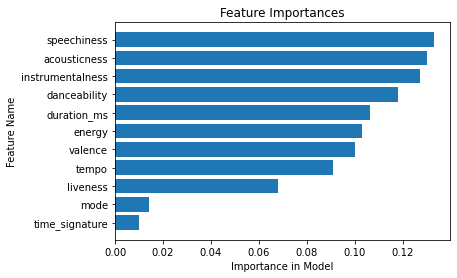

In [30]:
evaluation.plot_feature_importances(model, features.spotify_feature_list)

In [ ]:
X = features.get_spotify_feature_matrix(df, continous=True)

In [10]:
import umap

2022-10-13 23:09:19.608982: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
df_sub = df.sample(frac=0.1, random_state=42)
X_sampled = features.get_spotify_feature_matrix(df_sub)
X_sampled.shape


(10786, 11)

In [13]:
reducer = umap.UMAP()
X_reduced = reducer.fit_transform(X_sampled)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [14]:
X_reduced.shape

(10786, 2)

In [16]:
np.save("./data/X_reduced_umap2.npy", X_reduced)

In [17]:
y_str_sampled = labels.get_str_labels(df_sub)
y_str_sampled.shape

(10786,)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['World' 'Rock' 'Reggae' ... 'Metal' 'Rock' 'Rock']

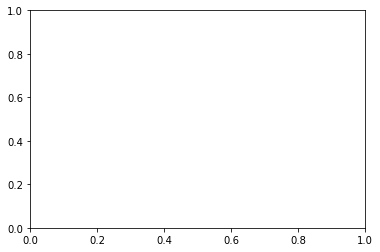

In [18]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y_str)

In [ ]:
from ml_project.classification import tf_nn
model = tf_nn.TFMusicClassifier()

model.fit(X_train, y_train, X_test, y_test)

score = model.evaluate(X_test,  y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])